In [ ]:
# ── 0_install_deps.ipynb ──
import importlib, subprocess, sys
# List your packages (matplotlib covers matplotlib.pyplot)
dependencies = ["numba", "numpy", "matplotlib", "tqdm"]

for pkg in dependencies:
    if importlib.util.find_spec(pkg) is None: # type: ignore
        print(f"Installing {pkg}…")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
    else:
        # optional: uncomment next line to see which ones were already present
        print(f"{pkg} already installed")
        pass

numba already installed
numpy already installed
matplotlib already installed
tqdm already installed


In [ ]:
import numpy as np
import os
import utilities.update
from utilities.simulation import Simulation2, Simulation3
import settings.settings_task2 as settings
import settings.settings_task3 as settings3
# import pandas as pd
import matplotlib.pyplot as plt
import logging
from utilities import utils

settings.init(10)
settings3.init(10)

# Initializing the system

In [3]:
# Set up output folder creation and logging
output_dir = utils.create_output_directory()
utils.setup_logging(output_dir)

[INFO] Writing all files to output\run_10/


# Task 2

14:52:20  [INFO]  === Task 2 started ===


[INFO] Writing all files to output\run_11/
vx, vy, vz = (-0.8061725203413048, 0.526706914171604, -0.9562292613498478)


100%|██████████| 200000/200000 [00:48<00:00, 4113.41it/s]
14:54:23  [INFO]  Figure saved → C:\Users\corne\Desktop\Uni\aktuel\CP\FinalProject8\FinalProject_CompPhys\output\run_11\energy_msd.png
14:54:23  [INFO]  === Task 2 done – 20001 frames analysed ===


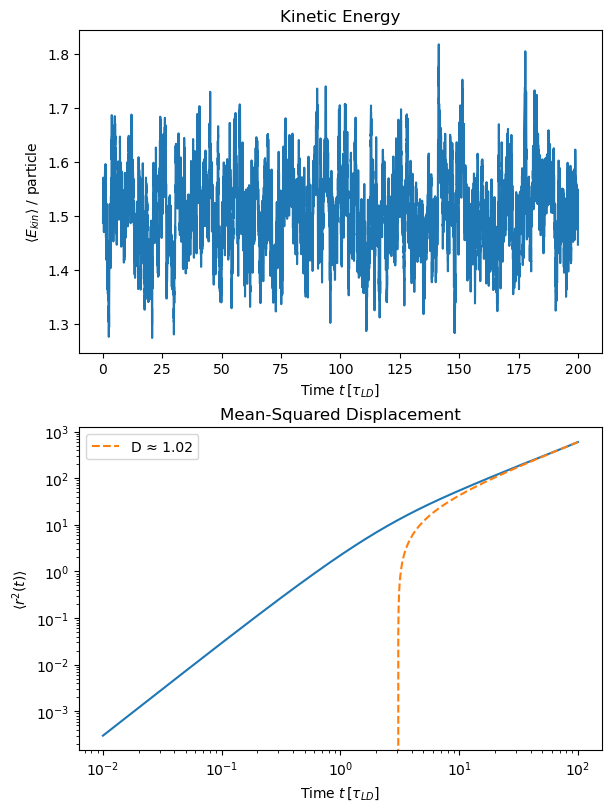

In [4]:
import task2
task2.main()

In [5]:
data = np.loadtxt('output/run_3/Task2unwrapped10_nsteps_20000')
                            # (f,)

# blk = 256
# x  = data[:, 1          : 1 + blk]
# y  = data[:, 1 + blk    : 1 + 2*blk]
# z  = data[:, 1 + 2*blk  : 1 + 3*blk]
# vx = data[:, 1 + 3*blk  : 1 + 4*blk]
# vy = data[:, 1 + 4*blk  : 1 + 5*blk]
# vz = data[:, 1 + 5*blk  : 1 + 6*blk]

In [6]:
np.shape(data)
blk = 256
x  = data[:, 1          : 1 + blk]
y  = data[:, 1 + blk    : 1 + 2*blk]
z  = data[:, 1 + 2*blk  : 1 + 3*blk]
vx = data[:, 1 + 3*blk  : 1 + 4*blk]
vy = data[:, 1 + 4*blk  : 1 + 5*blk]
vz = data[:, 1 + 5*blk  : 1 + 6*blk]

## Task 3

In [7]:
print(x[0])


[ 2.43254547e-01  3.35577078e+00  7.02058538e+00 -8.12399794e-01
  5.01966554e-01 -9.51808059e-01  1.97272856e+00  7.46185582e+00
  2.46224773e+00 -1.32593119e+00  1.83020658e+00  6.98091094e-01
  4.59842993e+00  3.20349621e+00  3.97260978e+00  5.45771937e-01
  5.32468268e-01 -2.32355563e-01  6.86195546e-01  2.62352126e-01
  8.35797227e-01  1.44872681e+00 -8.10790934e-01  3.58861856e-01
  1.91343283e+00  6.99955275e+00  4.76569821e+00  6.31371775e-01
 -1.39916812e+00  2.04024149e-01  3.63360680e+00  7.25889699e+00
  4.93262058e+00  2.86081902e-01  3.65966512e-01  1.05167748e+00
  8.39066652e-01  5.95248388e+00  7.55905197e+00  9.79196096e-01
  9.85862698e-01 -1.10873023e+00  4.61072550e+00  4.63474340e+00
  1.19923009e+00 -1.78766230e+00  6.31337533e-02 -1.08248034e+00
  1.69140001e+00  1.19594216e+00  1.62955274e+00  2.97240141e-02
 -1.47608875e+00 -1.47560361e+00  2.89786639e-01  1.29770471e+00
  6.54744018e+00 -8.99133489e-01 -9.51622676e-01  1.41700956e+00
  6.54585118e-01  2.76354

In [8]:
Cs_list = [10, 100, 333, 666, 1000] # Salt conentraction which will be multiplied by sigma=1
settings3.init(Cs_list[3])

In [9]:
g_of_r = Simulation3(output_dir, True, "Task3_", 10, settings3.random_seed, settings3)

g_of_r_list = []

for i in range(len(Cs_list)):
    logging.info(f"Starting simulation with salt conentration of Cs={Cs_list[i]}.")
    settings3.init(Cs_list[i])
    g_of_r = Simulation3(output_dir, True, f"Task3_Cs{Cs_list[i]}_", 10, settings3.random_seed, settings3)
    g_of_r_list.append(g_of_r)

bin_dr_arr = np.linspace(0, settings3.L/2, len(g_of_r)) + 0.5*settings3.dr

14:54:31  [INFO]  Starting with equilibration run of 8000 steps.
100%|██████████| 8000/8000 [00:26<00:00, 300.64it/s]
14:54:58  [INFO]  Starting with production run of 8000 steps.
100%|██████████| 8000/8000 [00:19<00:00, 418.94it/s]
14:55:17  [INFO]  Starting simulation with salt conentration of Cs=10.
14:55:17  [INFO]  Starting with equilibration run of 8000 steps.
100%|██████████| 8000/8000 [00:18<00:00, 436.34it/s]
14:55:36  [INFO]  Starting with production run of 8000 steps.
100%|██████████| 8000/8000 [00:23<00:00, 336.11it/s]
14:55:59  [INFO]  Starting simulation with salt conentration of Cs=100.
14:56:00  [INFO]  Starting with equilibration run of 8000 steps.
100%|██████████| 8000/8000 [00:16<00:00, 494.50it/s]
14:56:16  [INFO]  Starting with production run of 8000 steps.
100%|██████████| 8000/8000 [00:17<00:00, 457.24it/s]
14:56:33  [INFO]  Starting simulation with salt conentration of Cs=333.
14:56:33  [INFO]  Starting with equilibration run of 8000 steps.
100%|██████████| 8000

In [10]:
print(len(g_of_r_list[3]))

499


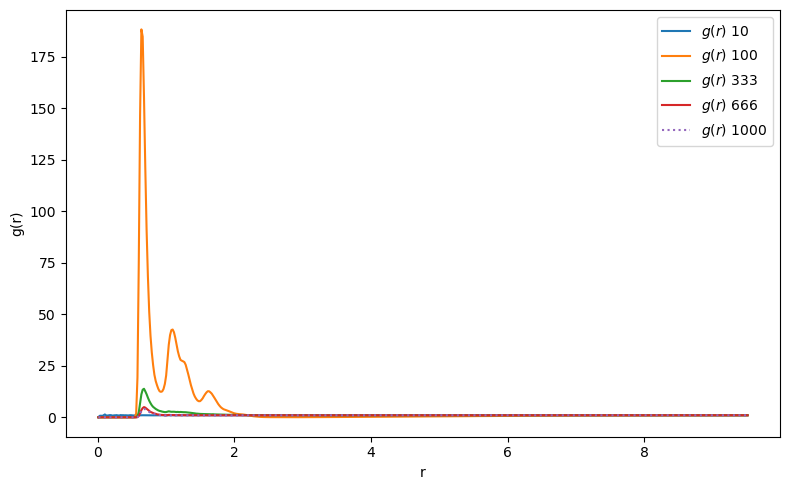

In [13]:
# devide by 4.184e-6 to go from g/mol × (nm/fs)^2 --> kcal
plt.figure(figsize=(8,5))
# devide by 4.184e-6 to go from g/mol × (nm/fs)^2 --> kcal

plt.plot(bin_dr_arr, g_of_r_list[0], label=r"$g(r)$ 10")  

plt.plot(bin_dr_arr, g_of_r_list[1], label=r"$g(r)$ 100")  
plt.plot(bin_dr_arr, g_of_r_list[2], label=r"$g(r)$ 333")  
plt.plot(bin_dr_arr, g_of_r_list[3], label=r"$g(r)$ 666")  
plt.plot(bin_dr_arr, g_of_r_list[4], label=r"$g(r)$ 1000", linestyle=':')  
plt.xlabel("r")
plt.ylabel("g(r)")
# plt.xlim(1.5, settings3.L/2)
#plt.ylim(0, 3)
plt.legend()
# plt.title("")
plt.tight_layout()
# plt.savefig('part_c_energies.pdf', dpi=150)

# Task 4 
(hat Arvid angefangen, funktioniert auch schon, aber ist noch nicht validiert)
Ihr könnt gerne Task 4 umschreiben / neu schreiben nach belieben

In [12]:
import task4
task4.main()

14:58:14  [INFO]  === Task 4 analysis started in run_11 ===
14:58:14  [INFO]  Wrapped trajectory: Task210_nsteps_200000
14:58:14  [INFO]  Unwrapped trajectory: Task2unwrapped10_nsteps_200000
14:58:42  [INFO]  g(r): peak 1.040  coordination 0.00
14:58:42  [INFO]  Isothermal compressibility κ_T ≈ 1.110
14:59:49  [INFO]  D_fit ≈ 0.102
14:59:49  [INFO]  kBT/ξ (= 1) provided – comparing to theory
14:59:50  [INFO]  Saved msd.png
14:59:50  [INFO]  === Task 4 analysis finished ===
